In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv('.\input\SQL_M8_support material_exercise_credit.csv',names=['idade',
                                                                              'sexo',
                                                                              'dependentes',
                                                                              'escolaridade',
                                                                              'estado_civil',
                                                                              'salario_anual',
                                                                              'tipo_cartao',
                                                                              'qtd_produtos',
                                                                              'iteracoes_12m',
                                                                              'meses_inativo_12m',
                                                                              'limite_credito',
                                                                              'valor_transacoes_12m',
                                                                              'qtd_transacoes_12m'])
df['sexo'] = df['sexo'].map({'F': 'Feminino', 'M': 'Masculino'})

In [67]:
df[['limite_credito', 'sexo']].groupby('sexo').mean().round(2)

,limite_credito
sexo,
Feminino,5748.98
Masculino,11201.36


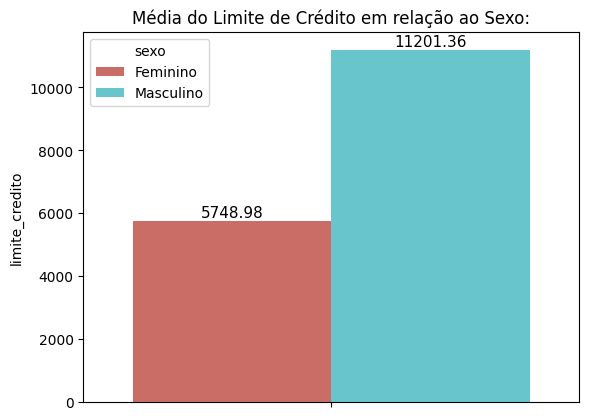

In [100]:
ax = sns.barplot(data=df[['limite_credito', 'sexo']].groupby('sexo').mean().round(2), y='limite_credito', hue='sexo', palette='hls')
ax.set_title('Média do Limite de Crédito em relação ao Sexo:')
for p in ax.patches:
        ax.annotate(f'{float(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() - 100),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points', rotation=0)

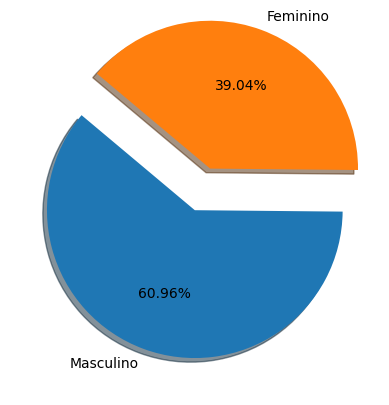

In [73]:
plt.pie(df.sexo.map({'F': 'Feminino', 'M': 'Masculino'}).value_counts(),
            explode=(0, 0.3),
            labels=df.sexo.map({'F': 'Feminino', 'M': 'Masculino'}).value_counts().index,
            autopct='%1.2f%%',
            shadow=True,
            startangle=140)
plt.show()

![EBAC](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/ebac_logo-data_science.png?raw=true)

# **Projeto Final do Curso de SQL da EBAC**
### **Exploração e análise de dados de crédito com SQL**

**Aluno:** [Marcelo Aires ![LinkedIn](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/linkedin.png?raw=true)](https://www.linkedin.com/in/marceloaco/)

---

## Dados do Dataset: 

Os dados representam informações de clientes de um banco e contam com as seguintes colunas: 

| *Coluna*                  | *Explicação*                                            |
|---------------------------|---------------------------------------------------------|
| **idade**                 | idade do cliente                                        |
| **sexo**                  | sexo do cliente (F ou M)                                |
| **dependentes**           | número de dependentes do cliente                        |
| **escolaridade**          | nível de escolaridade do cliente                        |
| **salario_anual**         | faixa salarial do cliente                               |
| **tipo_cartao**           | tipo de cartão do cliente                               |
| **qtd_produtos**          | quantidade de produtos comprados nos últimos 12 meses   |
| **iteracoes_12m**         | quantidade de iterações/transações nos últimos 12 meses |
| **meses_inativo_12m**     | quantidade de meses que o cliente ficou inativo         |
| **limite_credito**        | limite de crédito do cliente                            |
| **valor_transacoes_12m**  | valor das transações dos últimos 12 meses               |
| **qtd_transacoes_12m**    | quantidade de transações dos últimos 12 meses           |


A tabela foi criada no **AWS Athena** junto com o **S3 Bucket**, a própria EBAC disponibilizou o arquivo CSV.

---

## **Criação da Tabela no AWS Athena:**

Após criar o bucket no AWS S3 e carregar o CSV disponibilizado pela EBAC, podemos criar a Tabela no AWS Athena vinculado com o bucket que iremos utilizar neste projeto.

Para criarmos a tabela utilizamos este comando:

#### CREATE TABLE:

```sql
CREATE EXTERNAL TABLE IF NOT EXISTS default.credito (
	`idade` int,
	`sexo` string,
	`dependentes` int,
	`escolaridade` string,
	`estado_civil` string,
	`salario_anual` string,
	`tipo_cartao` string,
	`qtd_produtos` bigint,
	`iteracoes_12m` int,
	`meses_inativo_12m` int,
	`limite_credito` float,
	`valor_transacoes_12m` float,
	`qtd_transacoes_12m` int
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
	'serialization.format' = ',',
	'field.delim' = ','
)
LOCATION 's3://credito-projetofinal-marceloaco/'
TBLPROPERTIES ('has_encrypted_data' = 'false');
```
![Query1](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/Criar-Tabela.png?raw=true)

---

## **Análise Exploratória de Dados (EDA):**

Após a criação da tabela no *AWS*, podemos analisar o conjunto de dados pelo *Athena*.

#### **Número de Linhas:**
```sql
SELECT COUNT(*) AS total_linhas
FROM credito;
```
![totalLinhas](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/totalLinhas.png?raw=true)

#### **Número de Colunas:**
```sql
SELECT COUNT(*) AS total_colunas
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = 'credito';
```
![totalColunas](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/totalColunas.png?raw=true)

---

#### **Tipos de cada coluna:**
```C#
DESCRIBE credito;
```
| Coluna               | Tipo   |
| -------------------- | ------ |
| idade                | int    |
| sexo                 | string |
| dependentes          | int    |
| escolaridade         | string |
| estado_civil         | string |
| salario_anual        | string |
| tipo_cartao          | string |
| qtd_produtos         | bigint |
| iteracoes_12m        | int    |
| meses_inativo_12m    | int    |
| limite_credito       | float  |
| valor_transacoes_12m | float  |
| qtd_transacoes_12m   | int    |

---

#### QUERY 1:

```sql
SELECT * FROM credito LIMIT 10;
```
![Limite10](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/credito_lim10.png?raw=true)

> Primeira visualização da Tabela (10 primeiras linhas), já percebemos alguns valores nulos.

---

#### QUERY 2:

```sql
SELECT idade,                COUNT(idade)                AS Quantidade FROM credito GROUP BY idade;
SELECT sexo,                 COUNT(sexo)                 AS Quantidade FROM credito GROUP BY sexo;
SELECT dependentes,          COUNT(dependentes)          AS Quantidade FROM credito GROUP BY dependentes;
SELECT escolaridade,         COUNT(escolaridade)         AS Quantidade FROM credito GROUP BY escolaridade;
SELECT estado_civil,         COUNT(estado_civil)         AS Quantidade FROM credito GROUP BY estado_civil;
SELECT salario_anual,        COUNT(salario_anual)        AS Quantidade FROM credito GROUP BY salario_anual;
SELECT tipo_cartao,          COUNT(tipo_cartao)          AS Quantidade FROM credito GROUP BY tipo_cartao;
SELECT qtd_produtos,         COUNT(qtd_produtos)         AS Quantidade FROM credito GROUP BY qtd_produtos;
SELECT iteracoes_12m,        COUNT(iteracoes_12m)        AS Quantidade FROM credito GROUP BY iteracoes_12m;
SELECT meses_inativo_12m,    COUNT(meses_inativo_12m)    AS Quantidade FROM credito GROUP BY meses_inativo_12m;
SELECT limite_credito,       COUNT(limite_credito)       AS Quantidade FROM credito GROUP BY limite_credito;
SELECT valor_transacoes_12m, COUNT(valor_transacoes_12m) AS Quantidade FROM credito GROUP BY valor_transacoes_12m;
SELECT qtd_transacoes_12m,   COUNT(qtd_transacoes_12m)   AS Quantidade FROM credito GROUP BY qtd_transacoes_12m;
```
![escolaridadeNA](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/escolaridadeNA.png?raw=true)
![estadoCivilNA](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/estadoCivilNA.png?raw=true)
![salarioAnualNA](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/salarioAnualNA.png?raw=true)
![sexoQuant](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/sexoQuant.png?raw=true)
![tiposCartaoQuant](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/tiposCartaoQuant.png?raw=true)

> Analisando cada uma das colunas, percebemos aonde estão os valores nulos, como mostra nas figuras acima.

> Percebemos que na coluna 'sexo' contem mais Homens do que Mulheres. 

> E na coluna 'tipo_cartao' verificamos que existem 4 tipos de cartões, sendo o cartão blue mais comum entre eles.
---

## **Análise de Dados:**

Após a exploração dos dados e do entedimento do nosso dataset, podemos analisar os dados e buscar aprofundar ainda mais no entendimento do negócio.

#### **Média do Limite de Crédito em relação ao salário anual:**
```sql
SELECT AVG(limite_credito) AS media_limite_credito,
	salario_anual
FROM credito
WHERE salario_anual != 'na'
GROUP BY salario_anual
ORDER BY media_limite_credito DESC;
```
![mediaLimiteCreditoSalario](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/mediaLimiteCreditoSalario.png?raw=true)

> Vemos que existe um padrão para liberação de crédito de acordo com o salário anual do cliente.

#### **Análise de sexo:**
```sql
SELECT sexo,
	COUNT(*) AS quantidade
FROM credito
GROUP BY sexo;
```
![sexoQuant](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/sexoQuant.png?raw=true)
![graficoSexoQuant](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/graficoSexoQuant.png?raw=true)

> Vemos que o número de homens é superior ao número de mulheres. Vamos nos aprofundar nas etapas seguintes.

---

#### **Média do Limite de Crédito em relação ao Sexo:**

```sql
SELECT sexo,
	AVG(limite_credito),
	COUNT(sexo) AS Quantidade
FROM credito
GROUP BY sexo
ORDER BY Quantidade DESC;
```

![salarioAnualSexoQuant](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/salarioAnualSexoQuant.png?raw=true)

#### **Salário Anual em relação ao Sexo:**

```sql
SELECT sexo,
	salario_anual,
	COUNT(sexo) AS Quantidade
FROM credito
WHERE salario_anual != 'na'
GROUP BY sexo, salario_anual
ORDER BY Quantidade DESC;
```

![salarioAnualSexoQuant](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/salarioAnualSexoQuant.png?raw=true)